In [48]:
import fastai
from fastai.text.all import *
from pathlib import Path
import os
import numpy as np
from PIL import Image
import re

In [105]:
def wordToImg(word):
    """
    Convert given word to image
    """
    word_arr = np.reshape(np.array([1 if int(char)==0 else 0 for char in word]),
                                  (len(word)//175, 175)).transpose()
    im = Image.fromarray((word_arr * 255).astype(np.uint8))
#     im.show()
    return im

In [50]:
TEXT_FILES_DIR = Path('/home/ibukey/ttmp/primus-tokenized_2')
# TEXT_FILES_DIR = Path('/home/ibukey/ttmp/primus-leipzig-small')

In [54]:
whitespace_tokenizer = BaseTokenizer()

In [55]:
data_loader = TextDataLoaders.from_folder(path=TEXT_FILES_DIR, 
    is_lm=True, valid_pct=0.1, 
    tok_tfm=whitespace_tokenizer)

Rules: []


In [56]:
learn = language_model_learner(
    data_loader, 
    AWD_LSTM, 
    metrics=[accuracy, Perplexity()], 
    path=str(TEXT_FILES_DIR), 
    pretrained=False,
    wd=0.1).to_fp16()

SuggestedLRs(valley=0.0005754399462603033)

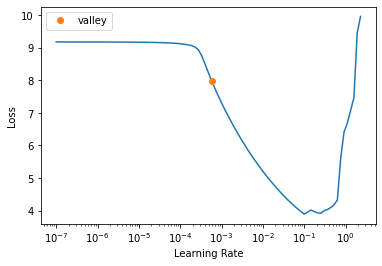

In [57]:
learn.lr_find()

In [58]:
lr = 5e-4

In [59]:
learn.fit_one_cycle(1, lr)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.344530,0.344835,0.967801,1.411757,07:35


In [34]:
# len(data_loader.vocab)

In [61]:
learn.unfreeze()
learn.fit_one_cycle(10, lr)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,0.354253,0.344521,0.967801,1.411314,07:35
1,0.249066,0.245041,0.968489,1.277674,07:41
2,0.209416,0.203889,0.970666,1.226162,07:35
3,0.193209,0.184478,0.971701,1.202590,07:25
4,0.181104,0.173038,0.972176,1.188911,07:21
5,0.172163,0.163791,0.972613,1.177969,07:21
6,0.161209,0.156753,0.973113,1.169707,07:26
7,0.154421,0.151842,0.973405,1.163976,07:32
8,0.156350,0.149058,0.973611,1.160740,07:25
9,0.153296,0.148429,0.973668,1.160011,07:18


In [62]:
learn.save('tokenized_2-model')

Path('/home/ibukey/ttmp/primus-tokenized_2/models/tokenized_2-model.pth')

In [164]:
SEED = """
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111100000000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111110000000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111100000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000000111111111111111111111111111000000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000011111111111111111111111111111100000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000000111111111111111111111111111111111000000011100000000000000000000000000000000000000000000000000 
0000000000000000000000000000000000000000000000000011100000000000000011100000000011111111111111111100000011101111111100000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000111111111111111100000000011100001111110000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000001111111111111110000000000011100000111111000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000111111111111111000000000000011100000001111000011100000000000000111000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100001111111111111110000000000000011100000000111100011100000000000111111111100000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100011111111111111100000000000000011100000000011110011100000000001111111111110000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100111111111111111100000000000000011100000000011110011100000000011111111111111100000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011101111111111111111100000000000000011100000000001111011100000000111111111111111110000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111111011100000000000111111100000000000111011100000000111111111111111110000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111110011100000001111111111110000000000111011100000001111111111111111111000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111100011100000011111111111111100000000011111100000001111111111111111111000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111111000011100001111111111111111110000000011111100000001111111111111110111100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011111111111110000011100011111111111111111111000000011111100000001111111111111110011100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000111111111111100000011100111111111111111111111100000001111100000000111111111111110011100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000001111111111111000000011101111111111110011100011110000001111100000000111111111111100011100000000000000000000000 0000000000000000000000000000000000000000000011111111111111111000011111111111110000000011111111111111000011100001110000001111100000000011111111111000001100000000000000000000000 0000000000000000000000000000000000000000111111111111111111111111111111111111110000000011111111111110000011100000111000001111100000000001111111111000001100000000000000000000000 0000000000000000000000000000000000000111111111111111111111111111111111111111100000000011111111111110000011100000011000001111100000000000111111100000001100000000000000000000000 0000000000000000000000000000000000011111111111111111100000011111111111111111100000000011111111111100000011100000011000001111100000000000000000000000001100000000000000000000000 0000000000000000000000000000000001111111111111100011100000000011111111111111111111110011111111111100000011100000001000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000000111111111111100000011100000000011111111111111111111111111111111111000000011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000001111111111110000000011100000000111111111111100111111111111111111111000000011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000011111111111100000000011100000001111111111111000000000111111111111111111110011100000000000001111100000000000000000000000011100000000000000000000000 0000000000000000000000000000111111111110000000000011100000011111111111110000000000000011111111111111111111110000000000001111100000000000000000000000111000000000000000000000000 0000000000000000000000000001111111111110000000000011100000111111111111100000000000000011111111111111111111111111110000001111100000000000000000000001111000000000000000000000000 0000000000000000000000000011111111111100000000000011100001111111111111100000000000000011111111111000111111111111111111111111100000000000000000000011110000000000000000000000000 0000000000000000000000000011111111111000000000000011100011111111111111100000000000000011111111111000000011111111111111111111100000000000000000000111110000000000000000000000000 0000000000000000000000000011111111111000000000000011101111111111111011100000000000000011111111111000000011100000111111111111111111100000000000011111100000000000000000000000000 0000000000000000000000000001111111111000000000000011111111111111110011100000000000000011111111111000000011100000000001111111111111111111111111111111000000000000000000000000000 0000000000000000000000000000111111111100000000000011111111111111100011100000000000000011111111111100000011100000000000111111111111111111111111111100000000000000000000000000000 0000000000000000000000000000011111111100000000000011111111111110000011100000000000000011111111111100000011100000000000111011100001111111111111110000000000000000000000000000000 0000000000000000000000000000000111111111000000011111111111111000000011100000000000000011111111111110000011100000000001111011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000001111111111111111111111111100000000011100000000000000011111111111111000011100000000001110011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000011111111111111111111110000000000011100000000000000011111111111111100011100000000111110011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000001111111111111100000000000000011100000000000000011111111111111110011100000001111100011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111111111111100000111111100011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100111111111111111111111111111000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111111111111111111111110000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100001111111111111111111111100000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000111111111111111111110000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000001111111111111111100000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000011111111111100000000000011100000000000000000000000000000000000000000000000000
"""

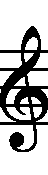

In [155]:
# # SEED = "0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000001000000000000000001000000000000000001000000000000000001000000000000000001000000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000011111111000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000111111111100000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000001111111111110000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111100000011100000000011111111111111000000000000000000111111000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111110000011100000001111111011111111110000000000000001111111110000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111000011101111111111111011111111111111110000000011111111111000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111011111000011100111111111110011101111111111100000000011111011111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000111111100011100011111111100011100111111111000000000111111100011100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000111111100011100011111111000011100011111111000000000111111100011110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000111111100011100001111110000011100001111110000000000111111100001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000111111000011100001111100000011100000111110000000000011111100001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000011111000011100001111100000011100000111110000000000011111000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000000100000011100001111100000011100000111110000000000000100000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000000000000011100011111000000011100000011111000000000000000000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000000000000011100011111000000011100000011111000000000000000000011110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111100000000000011100111111000000011100000011111100000000000000000111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111110000000000011111111111000000011100000011111111000000000000001111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111100000000011111111111000000011100000011111111111000000000111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111100000000011100000000111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111000000000011100000000011111111111111111111111000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111111111111111111000000000011100000000011111111111111111111110000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100111111111111111111110000000000011100000000001111111111111111111100000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111111111111111000000000000011100000000000011111111111111111000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000111111111111110000000000000011100000000000001111111111111100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000001111111100000000000000011100000000000000001111110000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000"
# SEED = "".join(SEED.split())
# # SEED = SEED.replace('\n', ' ').strip()
# # seed_tokens = SEED.split()
# tokens = [SEED[i * 175: ((i+1) * 175)] for i in range(len(SEED)//175)]
# seed_img = tokens_to_image(tokens)
# seed_img.show()
# pred = learn.predict(SEED, 20, temperature=0.8, no_unk=True)

In [165]:
SEED = "".join(SEED.split())

In [171]:
for i in range(7):
    pred = learn.predict(SEED2, 20, temperature=0.8, no_unk=True)
    pred = [SEED2] + pred.split()
    tokens = [t for t in pred if t != 'xxunk' and t!= 'xxfake']
    text = ""
    for token in tokens:
        text += token
        text += (STAFFLINE) * 22
    text = text[:-175]
    wordToImg(text).save('/home/ibukey/ttmp/tokenized-preds/c_{}.png'.format(i))

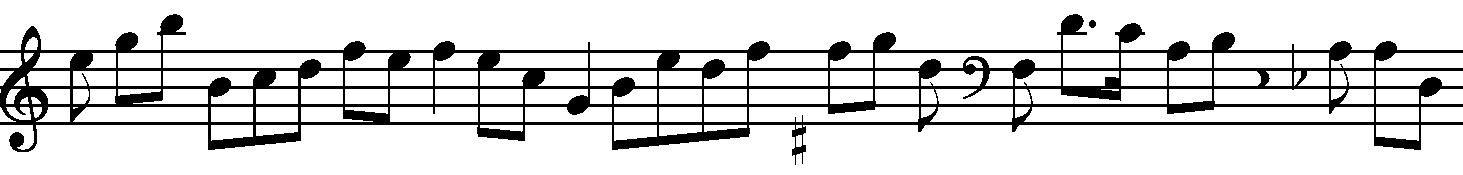

In [177]:
Image.open('/home/ibukey/ttmp/tokenized-preds/g2_2.png')

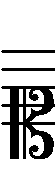

In [170]:
SEED2 = "0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000001000000000000000001000000000000000001000000000000000001000000000000000001000000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111111111111111111111111111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000011111111000000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000111111111100000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000001111111111110000000000000000000000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111100000011100000000011111111111111000000000000000000111111000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111110000011100000001111111011111111110000000000000001111111110000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111000011101111111111111011111111111111110000000011111111111000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111011111000011100111111111110011101111111111100000000011111011111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000111111100011100011111111100011100111111111000000000111111100011100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000111111100011100011111111000011100011111111000000000111111100011110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000111111100011100001111110000011100001111110000000000111111100001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000111111000011100001111100000011100000111110000000000011111100001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000011111000011100001111100000011100000111110000000000011111000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000000100000011100001111100000011100000111110000000000000100000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011110000000000000011100011111000000011100000011111000000000000000000001110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111000000000000011100011111000000011100000011111000000000000000000011110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111100000000000011100111111000000011100000011111100000000000000000111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111110000000000011111111111000000011100000011111111000000000000001111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111100000000011111111111000000011100000011111111111000000000111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111110000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111110000000011100000001111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111100000000011100000000111111111111111111111111100000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111111111000000000011100000000011111111111111111111111000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011101111111111111111111111000000000011100000000011111111111111111111110000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100111111111111111111110000000000011100000000001111111111111111111100000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100011111111111111111000000000000011100000000000011111111111111111000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000111111111111110000000000000011100000000000001111111111111100000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000001111111100000000000000011100000000000000001111110000000000000000000000000000 0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000"
SEED2 = "".join(SEED2.split())
wordToImg(SEED2)


In [156]:
pred = [SEED] + pred.split()
pred

['00000000000000000000000000000000000000000000000000111000000000000000111000000000000000111000011111111111111000000000000000111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011100000000000000011100000000000000011111111111111111111110000000000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001110000000000000001110000000000000001111111111111111111111110000000000001110000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000111000000000000000111000000000000001111111111111111111111111110000000000111000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000011100000000000000011100000000000011111111111111111111111111111100000000011100000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001110000000000000001110000000000011111111111111111111111111111111100000001

In [157]:
STAFFLINE = "0000000000000000000000000000000000000000000000000011100000000000000011100000000000000011100000000000000011100000000000000011100000000000000000000000000000000000000000000000000"

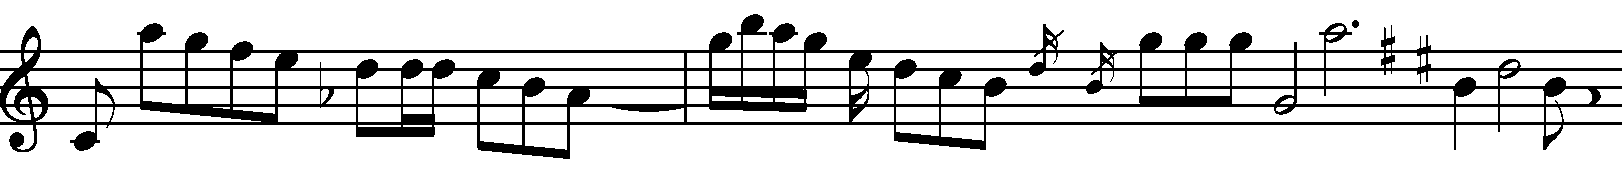

In [159]:
tokens = [t for t in pred if t != 'xxunk' and t!= 'xxfake']
text = ""
for token in tokens:
    text += token
    text += (STAFFLINE) * 22
text = text[:-175]
# print(len(text))
wordToImg(text)

In [97]:
# def decode_staff_predictions(pred):
#     pred = re.sub('<staff>', f"{STAFFLINE} " * 50, pred)
#     pred = re.sub('_', ' ', pred)
#     pred = re.sub(' +', ' ', pred)
#     return pred.strip()

In [1]:
decoded = decode_staff_predictions(pred)
tokens = decoded.split()

tokens = [t for t in tokens if t != 'xxunk' and t!= 'xxfake']

img = tokens_to_image(tokens)
img.show()
# img.save('generated_leipzig.png')

In [44]:
img.save('testing.png')

In [51]:
# img.save('leipzig_1.png') # 50, 0.8, seed=treble clef

In [23]:
# img.save('leipzig_2.png') # 50, 0.8, seed=treble clef

In [28]:
# img.save('leipzig_3.png') # 50, 1, seed=treble clef

In [32]:
# img.save('leipzig_4.png') # 50, 0.5, seed=treble clef

In [37]:
# img.save('leipzig_5.png') # 50, 0.5, seed=treble clef